In [0]:


import matplotlib.pyplot as plt
import random
import numpy as np 

W = 0.5
c1 = 2
c2 = 2 

n_iterations = int(input("Inform the number of iterations: "))
target_error = float(input("Inform the target error: "))
n_particles = int(input("Inform the number of particles: "))

class Particle():
    def __init__(self):
        self.position = np.array([(-1) ** (bool(random.getrandbits(1))) * random.random()*50, (-1)**(bool(random.getrandbits(1))) * random.random()*50])
        
        self.pbest_position = self.position
        self.pbest_value = float('inf')
        self.velocity = np.array([0,0])

    def __str__(self):
        print("I am at ", self.position, " meu pbest is ", self.pbest_position)
    
    def move(self):
        self.position = self.position + self.velocity


class Space():

    def __init__(self, target, target_error, n_particles):
        self.target = target
        self.target_error = target_error
        self.n_particles = n_particles
        self.particles = []
        self.gbest_value = float('inf')
        self.gbest_position = np.array([random.random()*50, random.random()*50])

    def print_particles(self):
        for particle in self.particles:
            particle.__str__()
   
    def fitness(self, particle):
      x = particle.position[0]
      y = particle.position[1]

      xplist = np.linspace(0,300,30)
      yplist = np.linspace(0,300,30)
      zp = 100
      m = 1
      
      I0=0.3

      intensity = []
      for xp in xplist:
        for yp in yplist:
          E = ((zp**(m+1))*I0) / (((xp-x)**2) + ((yp-y)**2) + (zp**2))**((m+3)/2)
          intensity.append(E)
  
      print(np.std(np.array(intensity)))
      evalu_fun = 1-(np.std(np.array(intensity)))
      print(evalu_fun)
      return evalu_fun

    def set_pbest(self):
        for particle in self.particles:
            fitness_cadidate = self.fitness(particle)
            if(particle.pbest_value > fitness_cadidate):
                particle.pbest_value = fitness_cadidate
                particle.pbest_position = particle.position
            

    def set_gbest(self):
        for particle in self.particles:
            best_fitness_cadidate = self.fitness(particle)
            if(self.gbest_value > best_fitness_cadidate):
                self.gbest_value = best_fitness_cadidate
                self.gbest_position = particle.position

    def move_particles(self):
        for particle in self.particles:
            global W
            new_velocity = (W*particle.velocity) + (c1*random.random()) * (particle.pbest_position - particle.position) + \
                            (random.random()*c2) * (self.gbest_position - particle.position)
            particle.velocity = new_velocity
            particle.move()
            

search_space = Space(1, target_error, n_particles)
particles_vector = [Particle() for _ in range(search_space.n_particles)]
search_space.particles = particles_vector
search_space.print_particles()

iteration = 0
while(iteration < n_iterations):
    search_space.set_pbest()    
    search_space.set_gbest()

    if(abs(search_space.gbest_value - search_space.target) <= search_space.target_error):
        break

    search_space.move_particles()
    iteration += 1
    
print("The best solution is: ", search_space.gbest_position, " in n_iterations: ", iteration)
search_space.print_particles()
print()


#plot a positions of LEDs
plt.plot(pbest_position[:,0], pbest_position[:,1], 'ro')
plt.show()


Inform the number of iterations: 10
Inform the target error: 0.000000006
Inform the number of particles: 10
0.9999975703009922   [ 26.89664612 -32.46896386]
0.9999976108914432   [-19.86134693  -1.24055431]
0.9999974668878754   [  6.51582527 -16.98144488]
0.9999971906695068   [-1.11666831  8.03987978]
0.9999966801598559   [12.3027527  45.68773404]
0.9999975778685093   [  2.72623378 -20.77760487]
0.9999981270880416   [-38.43463082 -17.49999214]
0.9999968777200798   [ 3.56627522 32.39370036]
0.9999982982506733   [-21.88000188 -45.94420775]
0.9999972259101886   [12.97227158 -7.10325888]
0.9999966958272586   [ 6.3494509 77.5702754]
0.9999964489002348   [33.29535131 76.31650127]
0.999996592463636   [17.02114364 96.78526207]
0.9999965785311272   [17.35342618 59.85727376]
0.9999966801598559   [12.3027527  45.68773404]
0.9999965740398894   [ 20.90002568 105.35666665]
0.9999964283367809   [44.01776121 85.18522355]
0.9999966434225619   [14.29926199 48.72576187]
0.9999969136403474   [ 4.83633545 2

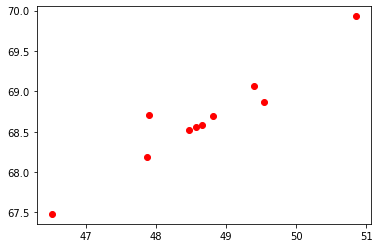

In [0]:
############# PSO algorithm #######

import matplotlib.pyplot as plt
import random
import numpy as np 

#function that models the problem
def fitness_function(position):
    x = position[0]
    y = position[1]

    xplist = np.linspace(0,300,30)
    yplist = np.linspace(0,300,30)
    zp = 150
    m=1
    I0=0.3

    intensity = []
    for xp in xplist:
      for yp in yplist:
        E = ((zp**2)*I0) / (((xp-x)**2) + ((yp-y)**2) + (zp**2))**2
        intensity.append(E)
        
  
    #evalu_fun = 1-np.std(np.array(intensity))
    
    evalu_fun = 1-(np.std(np.array(intensity)))
    
    return evalu_fun

#Some variables to calculate the velocity
W = 0.5
c1 = 2
c2 = 2
target = 1

n_iterations = int(input("Inform the number of iterations: "))
target_error = float(input("Inform the target error: "))
n_particles = int(input("Inform the number of particles: "))

particle_position_vector = np.array([np.array([(-1) ** (bool(random.getrandbits(1))) * random.random()*50, (-1)**(bool(random.getrandbits(1))) * random.random()*50]) for _ in range(n_particles)])
pbest_position = particle_position_vector
pbest_fitness_value = np.array([float('inf') for _ in range(n_particles)])
gbest_fitness_value = float('inf')
gbest_position = np.array([float('inf'), float('inf')])

velocity_vector = ([np.array([0, 0]) for _ in range(n_particles)])
iteration = 0
while iteration < n_iterations:
    for i in range(n_particles):
        fitness_cadidate = fitness_function(particle_position_vector[i])
        print(fitness_cadidate, ' ', particle_position_vector[i])
        
        if(pbest_fitness_value[i] > fitness_cadidate):
            pbest_fitness_value[i] = fitness_cadidate
            pbest_position[i] = particle_position_vector[i]

        if(gbest_fitness_value > fitness_cadidate):
            gbest_fitness_value = fitness_cadidate
            gbest_position = particle_position_vector[i]

    if(abs(gbest_fitness_value - target) < target_error):
        break
    
    for i in range(n_particles):
        new_velocity = (W*velocity_vector[i]) + (c1*random.random()) * (pbest_position[i] - particle_position_vector[i]) + (c2*random.random()) * (gbest_position-particle_position_vector[i])
        new_position = new_velocity + particle_position_vector[i]
        particle_position_vector[i] = new_position

    iteration = iteration + 1
    
print("The best position is ", gbest_position, "in iteration number ", iteration)


"""
import matplotlib.pyplot as plt
x = []
y = []
for i in pbest_position:
  for j in range(pbest_position[i]):
                 x.append(pbest_position[i])
                 y.append(pbest_position[j])

print(x)
plt.plot(x,y,'ro')
plt.axis([-300, 300, -300, 300])
plt.show()
"""
#print(pbest_position)


#plot a positions of LEDs
plt.plot(pbest_position[:,0], pbest_position[:,1], 'ro')
plt.show()


